# Raíces de funciones

El problema de hallar la raíz de una función, puede expresarse
formalmente como:

Dada $f(x): \mathbb{R} \rightarrow \mathbb{R}$, hallar $x^*$ : $f(x^*)=0$.

En este capítulo veremos algunos métodos numéricos para hallar
aproximaciones a la raíz de una función.

## Bisección

El primer m\'etodo que mencionaremos es el de {\em bisecci\'on}, para ello,
recordamos el teorema del valor medio:

Si $f(x):\mathbb{R}  \rightarrow \mathbb{R} $ es continua, y $f(a)\le g \le f(b) \,
\Rightarrow \, \exists x^* \in [a,b] : f(x^*)=g$

Tomando $g=0$, podemos asegurar que si el signo de $f(a)$ es distinto al signo
de $f(b)$, entonces habr\'a una ra\'{\i}z de $f(x)$ en el intervalo $[a,b]$.

Tambi\'en podr\'{\i}amos decir que tanto $a$ como $b$ son ra\'{\i}ces de $f(x)$
_con error menor que $|a-b|$_. Yendo un paso m\'as adelante, podr\'{\i}amos
decir que $m$, definido como $m=\frac{a+b}{2}$ es ra\'iz de $f(x)$ con error
menor que $\frac{|a-b|}{2}$.

Un ejemplo de implementación es el siguiente:


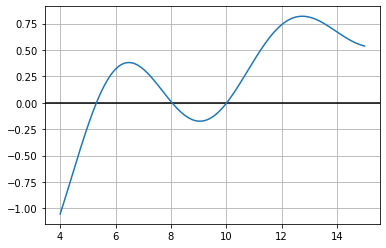

In [16]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.log(x) + np.cos(x)*np.exp(-0.1*x)-2.0
xg = np.linspace(4,15,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(xg,f(xg))


In [6]:
def bisect(f,a,b,tol, maxiter):  #definimos una función que encuentra la raiz de una función f, en el interbalo [a,b]
    err = tol + 100 #inicializamos el error inicial con un valor arbitrariamente alto
    niter = 0
    print('{:<12} {:<12} {:<12} {:<12}'.format('Iteración','a','b','error'))
    while err > tol and niter < maxiter:
        niter +=1
        m = (a + b)/2.0
        fm = f(m)
        fa = f(a)
        if (fa * fm < 0.0):
            b = m
        else:
            a = m
        err = abs(fm)
        print('{:<12} {:<12} {:<12} {:<12}'.format(niter, round(a,6), round(b,6), round(err,10)))
    print('Iteraciones totales=',niter,' Raíz=',m)
    return m

bisect(f,4,5.5,1e-5,15)

Iteración    a            b            error       
1            4.75         5.5          0.418471165 
2            5.125        5.5          0.1256704432
3            5.125        5.3125       0.0020525841
4            5.21875      5.3125       0.0599408749
5            5.265625     5.3125       0.0284566567
6            5.289062     5.3125       0.0130777303
7            5.300781     5.3125       0.0054812004
8            5.306641     5.3125       0.0017064285
9            5.306641     5.30957      0.0001750523
10           5.308105     5.30957      0.0007651951
11           5.308838     5.30957      0.0002949481
12           5.309204     5.30957      5.99171e-05 
13           5.309204     5.309387     5.75753e-05 
14           5.309296     5.309387     1.169e-06   
Iteraciones totales= 14  Raíz= 5.309295654296875


5.309295654296875

El algoritmo se asegura de mantener el signo de $f(a)$ distinto al signo de
$f(b)$, mientras el intervalo se va reduciendo a la mitad en cada paso.
Podr\'{\i}a suceder que el n\'umero de ra\'ices en el intervalo original sea
mayor que 1 (n\'otese que debe ser impar), el algoritmo selecciona siempre
el sub-intervalo que contenga un n\'umero impar de ra\'{\i}ces.

Podemos estimar entonces el error cometido al detener el algoritmo luego de
$n$ pasos ($n$ es la cantidad de veces que se ejecutan las instrucciones
dentro del bloque "while"):
\begin{equation}\label{conv_bisection}
|m-x^*| \leq |a-b| \left(\frac 12\right)^n
\end{equation}
Teniendo en cuenta que en una computadora estaremos trabajando con variables
de punto flotante en lugar de números reales, podemos interpretar que
-excluyendo casos particulares cuando la ra\'{\i}z es cercana a cero-,
estaremos determinando una cifra binaria m\'as en la mantisa de la soluci\'on
en cada paso de tiempo.

Si tenemos en cuenta el est\'andar [IEEE 754](https://en.wikipedia.org/wiki/IEEE_754)
para la representaci\'on de
n\'umeros en punto flotante, una variable de precisi\'on simple utiliza
24 bits en su mantisa, mientras que una de doble precisi\'on destina
al efecto 53 bits. En estos casos no se justificar\'{\i}a exceder las 24 (53)
iteraciones del algoritmo para alcanzar la m\'axima precisi\'on posible.

## Métodos de aproximaciones sucesivas
Llamaremos de esta manera a una metodolog\'{\i}a general para obtener,
a partir de la funci\'on dato y una aproximaci\'on de la ra\'{\i}z, una
nueva aproximaci\'on. De esta manera, partiendo de una aproximaci\'on
inicial $x_0$ (a veces denominado "semilla") aplicamos la
metodolog\'{\i}a para obtener $x_1$ y luego
la continuamos aplicando sucesivamente. Utilizaremos la notaci\'on
$\varphi(x)$ para esta {\em funci\'on de iteraci\'on}: $x_1=\varphi(x_0)$,
$x_2=\varphi(x_1)$, ... en general:
\begin{equation}\label{iter_ptofijo}
x_{n+1}=\varphi\left(x_n\right)
\end{equation}
Si esta sucesi\'on de aproximaciones converge, digamos que al valor
$\hat{x} = \Atop{\lim}{\scriptstyle n \rightarrow \infty} x_n$,
$\hat{x} = \lim\limits_{n \to \infty} x_n$,
se dice que $\hat{x}$ es un
{\em punto fijo} de $\varphi(x)$.
La idea es construir $\varphi(x)$ de manera que tenga un punto fijo en la
ra\'{\i}z de la funcion $f(x)$. Una elecci\'on trivial ser\'{\i}a:
$\varphi(x) = f(x) + x$. Otra posibilidad es operar con la expresi\'on
de $f(x)$, para que quede en la forma $x=g(x)$ y tomar $\varphi(x)=g(x)$.
En ambos casos se cumple que si $\hat{x}$ es punto fijo de $\varphi$
($\varphi(\hat{x})=\hat{x}$), entonces $f(\hat{x})=\varphi(\hat{x})-\hat{x}=0$.
Pasemos a trabajar entonces con nuestro nuevo problema:

Dada $\varphi(x): \R \rightarrow \R$, hallar $x^*$ : $\varphi(x^*)=x^*$.

Supongamos que $\varphi(x)$ tiene un punto fijo $x^*$ y resulta continua y
suficientemente diferenciable en un entorno del mismo. Podemos entonces
plantear un desarrollo de Taylor en torno al punto fijo, y evaluarlo en
$x_n$, una aproximaci\'on al punto fijo:
$$
x_{n+1} = \varphi(x_n)=\varphi(x^*) + \varphi^\prime(x^*)(x_n-x^*) +
  \varphi^{\prime\prime}(x^*)\frac{(x_n-x^*)^2}{2} + ...
$$
Si definimos $\epsilon_n = x_n-x^*$ (el error de la aproximaci\'on $x_n$),
restando $x^*$ en la expresi\'on anterior se obtiene:
$$
x_{n+1}-x^*=\epsilon_{n+1}=\varphi(x^*) - x^* +\varphi^\prime(x^*)\epsilon_n +
  \varphi^{\prime\prime}(x^*)\epsilon_n^2 + ...
$$
observando que $\varphi(x^*)=x^*$, la expresi\'on resulta:
\begin{equation}\label{error_ptofijo}
\epsilon_{n+1}=\varphi^\prime(x^*)\epsilon_n +
\varphi^{\prime\prime}(x^*)\frac{\epsilon_n^2}{2} +
\varphi^{\prime\prime\prime}(x^*)\frac{\epsilon_n^3}{3!} + ...
\end{equation}
Suficientemente cerca del punto fijo, el t\'ermino dominante ser\'a el de
la potencia m\'as baja.
Si $\varphi^\prime(x^*)\neq 0$ el error evolucionar\'a como:
\begin{equation}\label{conv_ptofijo_lineal}
\left|\epsilon_{n+1}\right| \simeq \left|\varphi^\prime(x^*)\right|
\left|\epsilon_n\right|
\end{equation}
y ser\'a condici\'on necesaria para que el error se reduzca (y que el
m\'etodo converja) que
$\left|\varphi^\prime(x^*)\right| <1$

Por otra parte, si $\left|\varphi^\prime(x^*)\right| = 0$ y
$\varphi^{\prime\prime}(x^*)\neq 0$, el error se comportar\'a como:
\begin{equation}\label{conv_ptofijo_cuad}
\left|\epsilon_{n+1}\right| \simeq \left|\varphi^{\prime\prime}(x^*)\right|
\left|\epsilon_n\right|^2
\end{equation}


### Orden de convergencia

Si existen $p\in \mathbb{N}$ y $c\in \R$ tales que:
$\Atop{\lim}{\scriptstyle n\rightarrow\infty}$
$\lim\limits_{n \to \infty}\frac{\left|\epsilon_{n+1}\right|}{\left|\epsilon_n\right|^p} = c$,  se dice que el m\'etodo converge con orden $p$.

De acuerdo a la expresi\'on \ref{error_ptofijo}, podemos concluir que en un
m\'etodo de aproximaciones sucesivas, con funci\'on de iteraci\'on
$\varphi(x)$ suficientemente derivable en un entorno del punto fijo, el orden
de convergencia est\'a dado por el primer orden de derivada que no se anula
en el punto fijo.

Observaciones:

* Si $\varphi^\prime(x^*)\neq 0$, el orden $p$ es 1 y la constante
  $c$ es justamente $\varphi^\prime(x^*)$.
* Si $\varphi^\prime(x^*) = 0$
  y $\varphi^{\prime\prime}(x^*)\neq 0$, el orden de convergencia es 2 y la
  constante $c$ vale $\varphi^{\prime\prime}(x^*)/2$.
* Podr\'{\i}amos adem\'as considerar que el m\'etodo de bisecci\'on resulta
  ``competitivo'' contra un m\'etodo de aproximaciones sucesivas
  con convergencia de orden 1 y constante $c=1/2$.
* El n\'umero de cifras significativas en el resultado crece con el
  n\'umero de iteraciones elevado al orden de convergencia.
  
Un ejemplo de implementación es el siguiente:


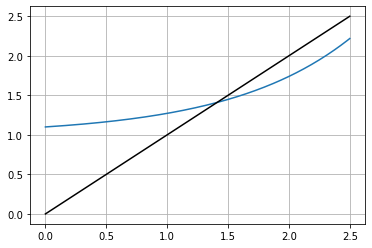

In [28]:
f = lambda x: 1 + np.exp(x)/10
x0 = 2.2

xg = np.linspace(0,2.5,200)
plt.grid()
plt.plot(xg,f(xg))
plt.plot(xg,xg, 'k')

In [29]:
def suc_aprox(f,x0,tol, maxiter):  #definimos una función que encuentra la raiz de una función f, a partir de la semilla x0
    err = tol + 100 #inicializamos el error inicial con un valor arbitrariamente alto
    niter = 0
    x = [x0]
    y = [0]
    xprev = x0
    print('{:<12} {:<12} {:<12} '.format('Iteración','x_n','error'))
    while err > tol and niter < maxiter:
        niter += 1    # incrementa contador
    # iteración propiamente dicha:  
        xnext=f(xprev)
    # Guarda un par de puntos de la secuencia:
    # -Punto sobre y=f(x)0 
        x.append(xprev)
        y.append(xnext)
    # -Punto sobre y=x
        x.append(xnext)
        y.append(xnext)
    # Calcula cuánto fue la corrección
        corr=np.linalg.norm(xnext-xprev)
    # Guarda último valor de la aproximación en xprev
        xprev = xnext
        err = abs(f(xnext)-xnext)
        print('{:<12} {:<12} {:<12}'.format(niter, round(xnext,6), round(err,10)))
    print('Iteraciones totales=',niter,' Punto fijo=',xnext)
    return xnext, np.array(x), np.array(y)

m, x, y = suc_aprox(f,x0,1e-5, 10)

Iteración    x_n          error        
1            1.902501     0.2322374362
2            1.670264     0.1389069201
3            1.531357     0.0689122024
4            1.462445     0.0307948333
5            1.43165      0.0130900019
6            1.41856      0.0054432468
7            1.413117     0.0022425872
8            1.410874     0.0009203886
9            1.409954     0.0003771432
10           1.409577     0.0001544399
Iteraciones totales= 10  Punto fijo= 1.4095765902690762


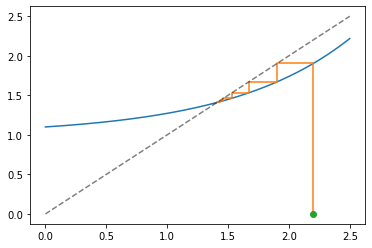

In [31]:
# Grafica: y=x, y=f(x), puntos de la secuencia y la recta y=x
plt.plot(xg, f(xg))
plt.plot(x, y)
plt.plot(xg,xg, 'k', alpha = 0.5, ls = 'dashed')
plt.plot(x0, 0, 'o') # semilla inicial


### Interpretación gráfica
Supongamos que estamos en el caso en que  $\varphi^\prime(x^*) \neq 0$. La
figura \ref{pfijoIGraf} muestra los primeros dos pasos del proceso iterativo
en 4 casos distintos. En todos los diagramas se grafica $y=\varphi(x)$ y la
recta $y=x$. El punto fijo de la funci\'on, $x^*$ es donde se cruzan estas
curvas. En la fila de arriba se ilustran a la izquierda el caso
$0<\varphi^\prime(x^*)<1$ y a la derecha el caso $-1<\varphi^\prime(x^*)<0$,
ambos resultan en convergencia. En la fila de abajo, a la izquierda es el
caso $\varphi^\prime(x^*)>1$ y a la derecha el caso $\varphi^\prime(x^*)<-1$,
en estos casos, por m\'as cercana que se encuentre la semilla al punto fijo,
el proceso diverge.

La metodolog\'{\i}a, com\'un a todos los casos es la siguiente: comenzamos en
el eje $x$, en la posici\'on de la aproximaci\'on inicial, $x_0$. Subimos hasta
encontrar la curva $y=\varphi(x_0)$ (evaluamos la funci\'on $\varphi(x)$ en
$x_0$ para encontar $x_1=\varphi(x_0)$. Para encontrar la posici\'on en el
eje $x$ de $x_1$, dibujamos la flecha horizontal desde el punto ($x_0,x_1$)
hasta el punto ($x_1, x_1$), sobre la recta $y=x$. Para evaluar $\varphi(x)$
en $x_1$ se dibuja la flecha vertical hasta encontar la curva $y=\varphi(x)$,
en el punto ($x_1,x_2$) y as\'{\i} sucesivamente.

![Evoluci\'on de las primeras iteraciones del m\'etodo de aproximaciones
  sucesivas en diferentes casos](./pfijo.png)
  

### El método de Newton-Raphson

Volviendo al problema de hallar la ra\'{\i}z de la funci\'on $f(x)$, 
utilicemos la aproximaci\'on en serie de Taylor en un entorno de la
aproximaci\'on $x_n$, para obtener un m\'etodo iterativo:
\begin{equation}
  f(x) = f(x_n) + f^\prime(x_n)(x-x_n)+f^{\prime\prime}(\xi)\frac{(x-x_n)^2}{2}
\end{equation}
donde $\xi \in [x, x_n]$. Evaluando la expresi\'on en la
ra\'{\i}z de $f(x)$, $x^*$, se obtiene:
\begin{equation}
  f(x^*) = 0 = f(x_n) + f^\prime(x_n)(x^*-x_n) +
  f^{\prime\prime}(\xi)\frac{(x^*-x_n)^2}{2}
\end{equation}
Si $x_n$ est\'a ``suficientemente cercano'' a $x^*$, el t\'ermino cuadr\'atico
es mucho menor que el resto y podemos plantear:
\begin{eqnarray}
  0 &\simeq& f(x_n) + f^{\prime}(x_n)(x^* - x_n)\\
  x^* &\simeq& x_n - \frac{f(x_n)}{f^\prime(x_n)}
\end{eqnarray}
Ahora bien, esta es una aproximaci\'on de la ra\'{\i}z, y podemos as\'i definir
nuestra nueva aproximaci\'on $x_{n+1}$, y la funci\'on de iteraci\'on
correspondiente al marco de aproximaciones sucesivas:
\begin{equation}\label{Newtonraphson}
  x_{n+1}=\varphi(x_n) = x_n - \frac{f(x_n)}{f^\prime(x_n)}
\end{equation}
Para evaluar el orden de convergencia, calculemos $\varphi\prime(x)$ en su
punto fijo $x^*$, que se corresponde con la ra\'{\i}z de $f(x)$:
\begin{eqnarray}
         \varphi^\prime(x^*)&=&1 - \cancelto{1}{\frac{f^\prime(x^*) f^\prime(x^*) -
           \cancelto{0}{f(x^*)} f^{\prime\prime}(x^*)}
         {\left[f^\prime(x^*)\right]^2}}=0
\end{eqnarray}
En general resulta $\varphi^{\prime\prime}(x^*)\neq 0$, de modo
que el m\'etodo resultante tiene convergencia cuadr\'atica. Pueden darse
casos particulares en que  $\varphi^{\prime\prime}(x^*) = 0$ y la convergencia
es de mayor orden. Otro caso particular es cuando la ra\'{\i}z tiene
multiplicidad mayor que 1. En ese caso $f^\prime(x^*) = 0$ y no necesariamente
se cumple que $\lim\limits_{x \to x^*} \varphi^{\prime}(x)=0$, resultando
en convergencia {\em lineal}.

Otra forma de definir el M\'etodo de Newton consiste en una construcci\'on
gr\'afica. Se toma la curva de
la funci\'on, se traza la recta tangente en $(x^{(k)},f(x^{(k)}))$ y el punto en
donde corta al eje $x$ es la nueva aproximaci\'on $x^{(k+1)}$.

Un ejemplo de implementación es el siguiente:


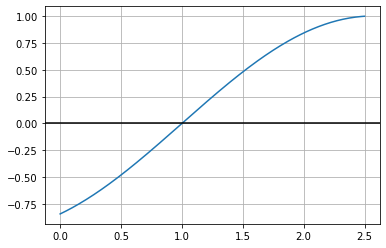

In [34]:
f = lambda x: np.sin(x-1)
df = lambda x: np.cos(x-1)
x0 = 2.0

xg = np.linspace(0,2.5,200)
plt.grid()
plt.plot(xg,f(xg))
plt.axhline(y=0,color='k')


In [37]:
def newton(f,x0,tol, maxiter):  #definimos una función que encuentra la raiz de una función f, a partir de la semilla x0
    err = tol + 100 #inicializamos el error inicial con un valor arbitrariamente alto
    niter = 0
    x = [x0]
    y = [0]
    xprev = x0
    print('{:<12} {:<12} {:<12} '.format('Iteración','x_n','error'))
    while err > tol and niter < maxiter:
        niter += 1    # incrementa contador
    #iteración propiamente dicha:  
        xnext=xprev-f(xprev)/df(xprev)
    # Guarda un par de puntos de la secuencia:
    # -Punto sobre y=f(x)
        x.append(xprev)
        y.append(f(xprev))
    # -Punto sobre y=0
        x.append(xnext)
        y.append(0)
    # Calcula cuánto fue la corrección
        corr=np.linalg.norm(xnext-xprev)
    # Guarda último valor de la aproximación en xprev
        xprev = xnext
        err = abs(f(xnext))
        print('{:<12} {:<12} {:<12}'.format(niter, round(xnext,6), round(err,10)))
    print('Iteraciones totales=',niter,' Punto fijo=',xnext)
    return xnext, np.array(x), np.array(y)

m, x, y = newton(f,x0,1e-5, 10)

Iteración    x_n          error        
1            0.442592     0.5289880971
2            1.065936     0.0658886846
3            0.999904     9.57219e-05 
4            1.0          0.0         
Iteraciones totales= 4  Punto fijo= 1.0000000000002924


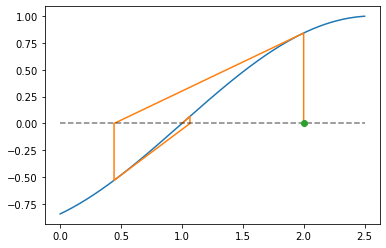

In [40]:
plt.plot(xg, f(xg))
plt.plot(x, y)
plt.plot(xg,0*xg, 'k', alpha = 0.5, ls = 'dashed')
plt.plot(x0, 0, 'o') # semilla inicial


### Newton-Raphson multi-dimensional
Si se tiene un sistema de $m$ ecuaciones con $m$ inc\'ognitas, o, m\'as
formalmente necesitamos:

Dada $\vec{f}(\vec{x}): \R \rightarrow \R$, hallar $\vec{x^*} \in \R^m$ tal que 
$\vec{f}(\vec{x^*}) = \vec{0}$.

podemos utilizar la f\'ormula de Taylor vectorial, desarrollemos cada una
de las componentes de $\vec{f}$, en un entorno del punto $\vec{x_n}$, hasta
primer orden:
\begin{equation}
  f_i(\vec{x})=f_i(\vec{x_n})+
  \sum_{j=1}^{m} \frac{\partial f_i}{\partial x_j} (x_j - {x_n}_j) + O(\Delta x^2),
  \,\,\, i=1,2, ... m
\end{equation}
o, simplificando:
\begin{equation}
  \vec{f}(\vec{x})=\vec{f}(\vec{x_n}) +
  \mathbb{J} \left(\vec{x}-\vec{x_n}\right) + O(\Delta x^2)
\end{equation}
donde utilizamos que $\mathbb{J}$ es la {\em matriz Jacobiana} de la funci\'on
$\vec{f}$, tal que: $\mathbb{J}_{i,j}=\frac{\partial f_i}{\partial x_j}$.

En forma an\'aloga al caso unidimensional:
$$
\vec{f}(\vec{x^*})=0\simeq\vec{f}(\vec{x_n}) + \mathbb{J} \left(\vec{x^*}-
  \vec{x_n}\right)
$$
\begin{equation}
  \vec{x_{n+1}} = \vec{x_n} - \mathbb{J}^{-1} \left(\vec{f}(\vec{x_n})\right)
\end{equation}
que constituye la f\'ormula de Newton para resolver sistemas generales de
$m$ ecuaciones con $m$ inc\'ognitas. Se hace necesario, en cada paso iterativo,
el c\'alculo de la matriz jacobiana y resolver un sistema lineal de $m$
ecuaciones com $m$ inc\'ognitas.